In [1]:
from concurrent.futures import ThreadPoolExecutor,as_completed
from data_loader import *
from itertools import product
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [ ]:
with open("config.yaml",'r') as file:
    config = yaml.safe_load(file)

In [ ]:
team = ['Liverpool','Chelsea','Arsenal','Newcastle']
season = [2021]
pairs = list(product(team,season))

with ThreadPoolExecutor(max_workers= 3) as executor:
    
    futures = {executor.submit(read_fixtures_for_season, t,s): (t,s) for t,s in pairs}
    
    

In [ ]:
print(stop - start)

In [ ]:
3*38

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

sales = pd.read_csv("/Users/echhitjoshi/Downloads/Sales.csv")
opps = pd.read_csv("/Users/echhitjoshi/Downloads/Opportunities.csv")

In [3]:
sales.tail()

,Sales_Order,Quarter,Month,Week,Closed_Date,Sale_Amount_,Group,Product,Category,Fiscal_Year,amendments,Sales_Representative,Customer_group,Customer,Country,Sales_Engineer,Customer_Category_,Description,Accounting_coVe
4613,SO340239315,2/1/2023,Jun,Week24-2023,6/26/2023,868.10,mau,Paid Eval License,55,2023,1,Nathan Howard,TZTUFN TBMFT,N B Dpn Ufdi Btjb Jod,TWN,QI,1,QBMMBEJVN BMMPZ TDSVC S,EZ2W
4614,SO340248955,3/1/2023,Aug,Week32-2023,8/9/2023,1595.81,mau,Paid Eval License,55,2023,1,Dylan Edwards,BTF,BTF Lpsfb,KOR,QI,1,IJHI IBSEOFTT SD TDSVC S,EZ2W
4615,SO340248958,3/1/2023,Aug,Week32-2023,8/22/2023,366.29,mau,Paid Eval License,55,2023,1,Dylan Edwards,BTF,BTF Lpsfb,KOR,QI,1,IJHI IBSEOFTT SD TDSVC S,EZ2W
4616,SO340249578,3/1/2023,Aug,Week32-2023,8/17/2023,491.97,mau,Paid Eval License,55,2023,1,Nathan Howard,TZTUFN TBMFT,Tpojpo Wjfuobn Dp Mue,VNM,QI,1,QBMMBEJVN BMMPZ TDSVC S,EZ2W
4617,SO340253427,3/1/2023,Sep,Week36-2023,9/20/2023,1770.92,mau,Paid Eval License,55,2023,1,Dylan Edwards,BTF,BTF Lpsfb,KOR,QI,1,IJHI IBSEOFTT SD TDSVC S,EZ2W


TypeError: 'Axes' object is not subscriptable

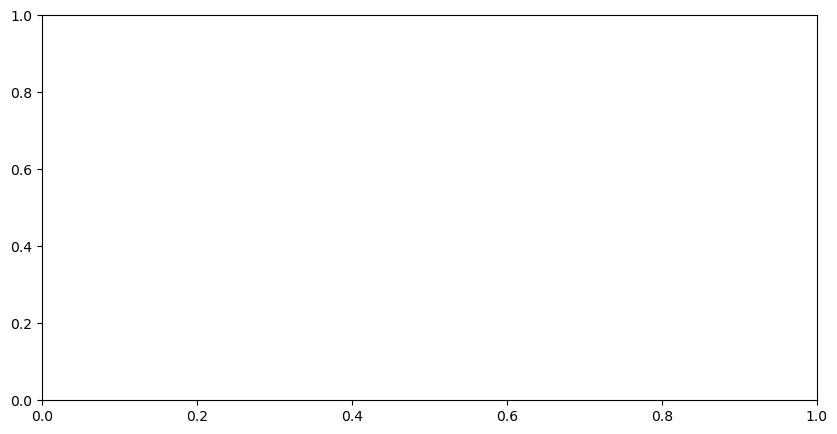

In [19]:
fig, axes = plt.subplots(1,1,figsize = (10,5),sharex=False)

sns.kdeplot(sales,x = 'Sale_Amount_',ax = axes[0,0])

In [ ]:
print(opps.shape)
print(opps.drop_duplicates().shape)

print(sales.shape)
print(sales.drop_duplicates().shape)

In [ ]:
opps['target'] = np.where(opps['Opportunity_number'].str.replace("ON","").isin(sales['Sales_Order'].str.replace("SO","")),1,0)

In [ ]:
opps.target.value_counts()

In [ ]:
X_train, X_test,y_train,ytest = train_test_split(opps.drop(columns = ['target']),opps['target'],stratify= opps['target'],test_size=.25)

In [ ]:
X_train.to_csv('/Users/echhitjoshi/Downloads/train_opp.csv')
X_test.to_csv('/Users/echhitjoshi/Downloads/test_opp.csv')


In [ ]:
# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# Required imports

from utils.notebookhelpers.helpers import Helpers
from utils.dtos.templateOutputCollection import TemplateOutputCollection
from utils.dtos.templateOutput import TemplateOutput
from utils.dtos.templateOutput import OutputType
from utils.dtos.templateOutput import ChartType
from utils.dtos.variable import Metadata
from utils.rcclient.commons.variable_datatype import VariableDatatype
from utils.dtos.templateOutput import FileType
from utils.dtos.rc_ml_model import RCMLModel
from utils.notebookhelpers.helpers import Helpers
from utils.libutils.vectorStores.utils import VectorStoreUtils

context = Helpers.getOrCreateContext(contextId='contextId', localVars=locals())

# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE
# Your code goes here
test_entity = Helpers.getEntityData(context, 'OutputDataset_4b2c0')

import pandas as pd
import numpy as np

output_df_1 = test_entity.copy()
output_df_1['predict_old'] =  output_df_1['predict']
# Test with threshold tuning:
output_df_1['predict']= np.where(output_df_1['1_prob'] > .45,1,0)


# -------------------------------------------------------------------------------- NOTEBOOK-CELL: CODE

Helpers.save_output_dataset(context=context, output_name='outputDataset', data_frame=output_df_1)

In [ ]:
test_dat = pd.read_csv("/Users/echhitjoshi/Downloads/Test_set-runConfig-4a2c91d9-627d-43d8-9b08-75d2223e67ff-Sales Recipe.csv")

In [ ]:
test_dat['target'] = test_dat['target'].astype('category')

# Save to CSV with category labels (human-readable)
test_dat.to_csv('/Users/echhitjoshi/Downloads/test_file.csv', index=False)

In [ ]:
### LLM


In [ ]:
import os
from openai import OpenAI

token = config['OPENAI_TOKEN']
endpoint = "https://models.github.ai/inference"
model = "gpt-4o"


def ask_gpt(dat, question):

    """
    dat: pandas DataFrame to ask gpt a question about
    question: question to ask of the data
    """

    client = OpenAI(
        base_url=endpoint,
        api_key=token,
    )

    response = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": """You are a helpful assistant who always responds with Python code.
                The response must be valid Python code that defines a python objects with appropriate structure. 
                No narrative—just the code."""
            },
            {
                "role": "user",
                "content": f"""
                
                Given this data: {dat.to_csv(index = False)}

                
                please answer:
                {question}
                
                
                
                
                
                """,
            }
        ],
        model=model
    )

    
    content = response.choices[0].message.content

    return content
    



In [ ]:
# Missing Dependency
#!conda install conda-forge::lxml

import pandas as pd

def print_unicode(url):
    
    # Return False if no url is input
    if not url:
        return False    
    html_dat = pd.read_html(url)
    df = html_dat[0]
    df.columns = df.iloc[0,:].values
    df = df.drop(0).reset_index(drop = True)

    print(df.head())


    df["x-coordinate"] = df["x-coordinate"].astype(int)
    df["y-coordinate"] = df["y-coordinate"].astype(int)
    
    # Fix the broken unicode chars, Got help from ChatGPT
    # df["Character"] = df["Character"].replace({
    #     "â": "█",
    #     "â": "░"
    # })
    df["Character"] = df["Character"].apply(lambda x: x.encode("latin1").decode("utf-8") if isinstance(x, str) else x)

    # Determine grid size, (0,0) to (max(X), max(Y))
    max_x = df["x-coordinate"].max()
    max_y = df["y-coordinate"].max()

    # Initialize empty grid
    grid = [[" " for _ in range(max_x + 1)] for _ in range(max_y + 1)]

    # Fill grid with characters
    for _, row in df.iterrows():
        x, y, ch = row["x-coordinate"], row["y-coordinate"], row["Character"]
        grid[max_y - y][x] = ch   # <— flip y-axis

    # Finally print the grid after placeing the character values in the grid 
    for row in grid:
        print("".join(row))

    return True
    




In [ ]:
url = 'https://docs.google.com/document/d/e/2PACX-1vTMOmshQe8YvaRXi6gEPKKlsC6UpFJSMAk4mQjLm_u1gmHdVVTaeh7nBNFBRlui0sTZ-snGwZM4DBCT/pub'

In [ ]:
print_unicode(url)

In [ ]:
import heapq

In [ ]:
l = [7,2,4,3,5,4,5,1]
heapq.heapify(l)

In [ ]:
smallest = heapq.heappop(l)

In [ ]:
small3 = heapq.nsmallest(3,l)
small3

In [ ]:
heapq.heappush(l,5)

In [ ]:
import pandas as pd
dat = pd.DataFrame({'group': ['C','T'],'users': [10000,9800], 'conversions': [500,520]})
dat['non_conversions'] = dat.users - dat.conversions
dat['conversion_rate'] = dat['conversions'] / dat['users']

from scipy.stats import chi2_contingency
t,p,dof,e = chi2_contingency(dat[['conversions','non_conversions']])
p

np.float64(0.34611656625306086)

In [9]:
dat

,group,users,conversions,non_conversions,conversion_rate
0,C,10000,500,9500,0.050000
1,T,9800,520,9280,0.053061


In [28]:
print(dat.query('group == "C"')['users'].item())
print(dat.query('group == "C"')['conversions'].item())

10000
500


In [65]:
import pymc as pm
import arviz as az
import pytensor
import xarray as xr
import os

if os.uname().machine.lower() == "arm64":
    pytensor.config.cxx = '/usr/bin/clang++'


# Data
k_c = int(dat.query('group == "C"')['conversions'].item())
n_c = int(dat.query('group == "C"')['users'].item())

k_t = int(dat.query('group == "T"')['conversions'].item())
n_t = int(dat.query('group == "T"')['users'].item())

with pm.Model() as model:
    c_p = pm.Beta('c_prior', alpha=1, beta=9)
    c_obs = pm.Binomial('c_obs', n=n_c, p=c_p, observed=k_c)

    t_p = pm.Beta('t_prior', alpha=1.2, beta=8.8)
    t_obs = pm.Binomial('tobs', n=n_t, p=t_p, observed=k_t)
    
    trace = pm.sample(draws=3000, tune=1000, target_accept=0.95)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c_prior, t_prior]


/opt/miniconda3/envs/dlcpu/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 1 seconds.


In [66]:
lift = trace.posterior['t_prior'] - trace.posterior['c_prior']

array([<Axes: title={'center': 't_prior'}>,
       <Axes: title={'center': 'c_prior'}>], dtype=object)

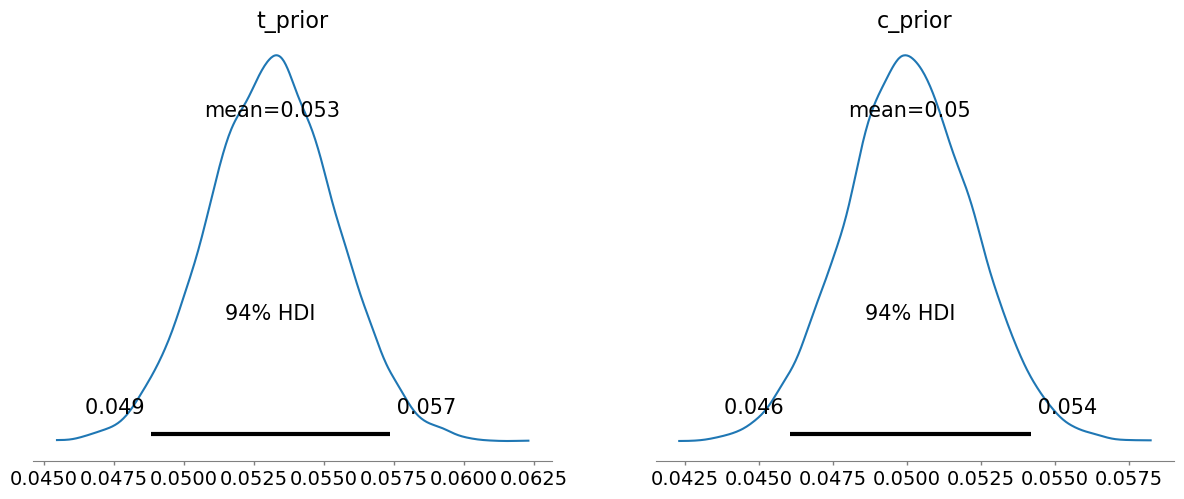

In [67]:
pm.plot_posterior(trace,var_names= ['t_prior','c_prior'])

In [68]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c_prior,0.050,0.002,0.046,0.054,0.0,0.0,8355.0,7153.0,1.0
t_prior,0.053,0.002,0.049,0.057,0.0,0.0,8237.0,7407.0,1.0


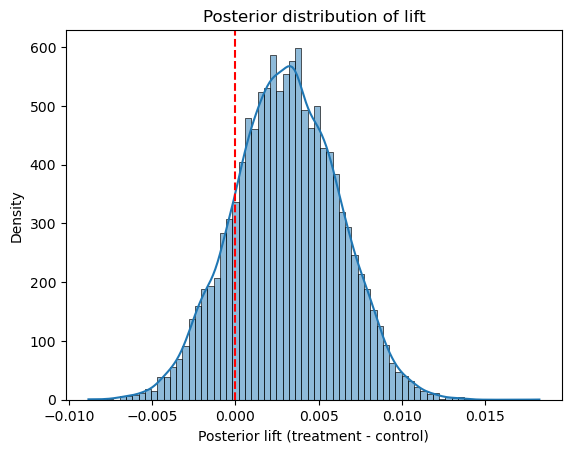

In [61]:
import matplotlib.pyplot as plt
lift_samples = trace.posterior['t_prior'].values - trace.posterior['c_prior'].values
lift_samples = lift_samples.flatten()  # flatten if needed

sns.histplot(lift_samples, kde=True)
plt.axvline(0, color='red', linestyle='--')  # zero lift line
plt.xlabel('Posterior lift (treatment - control)')
plt.ylabel('Density')
plt.title('Posterior distribution of lift')
plt.show()

In [63]:
np.mean(lift_samples > 0)

np.float64(0.83325)

In [64]:
np.mean(lift_samples > 0.005)

np.float64(0.27116666666666667)

In [ ]:
from statsmodels.stats.power import NormalIndPower, TTestIndPower

power = NormalIndPower()

analysis  = power.solve_power( effect_size= .03, alpha=.05, power = .80,ratio = 1)
analysis

17441.912242947048

In [ ]:
import pymc as pm
import arviz as az

# Example data
n_C, k_C = 10000, 500
n_T, k_T = 9800, 520

with pm.Model() as model:
    # Priors
    p_C = pm.Beta('p_C', alpha=1, beta=1)
    p_T = pm.Beta('p_T', alpha=1, beta=1)
    
    # Likelihood
    obs_C = pm.Binomial('obs_C', n=n_C, p=p_C, observed=k_C)
    obs_T = pm.Binomial('obs_T', n=n_T, p=p_T, observed=k_T)
    
    # Sample posterior
    trace = pm.sample(draws=4000, tune=1000, target_accept=0.95)

# Calculate lift samples
import numpy as np
lift_samples = trace.posterior['p_T'].values.flatten() - trace.posterior['p_C'].values.flatten()

# Probability treatment better than control
prob_treatment_better = (lift_samples > 0).mean()
print(f"Probability treatment better: {prob_treatment_better:.2f}")

# Posterior plot


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_C, p_T]


/opt/miniconda3/envs/dlcpu/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 1 seconds.


Probability treatment better: 0.83


In [100]:
pd.Series(trace.posterior['p_T'].values.flatten()).isna().sum()

np.int64(0)

array([<Axes: title={'center': 'p_C'}>, <Axes: title={'center': 'p_T'}>,
       <Axes: title={'center': 'lift'}>], dtype=object)

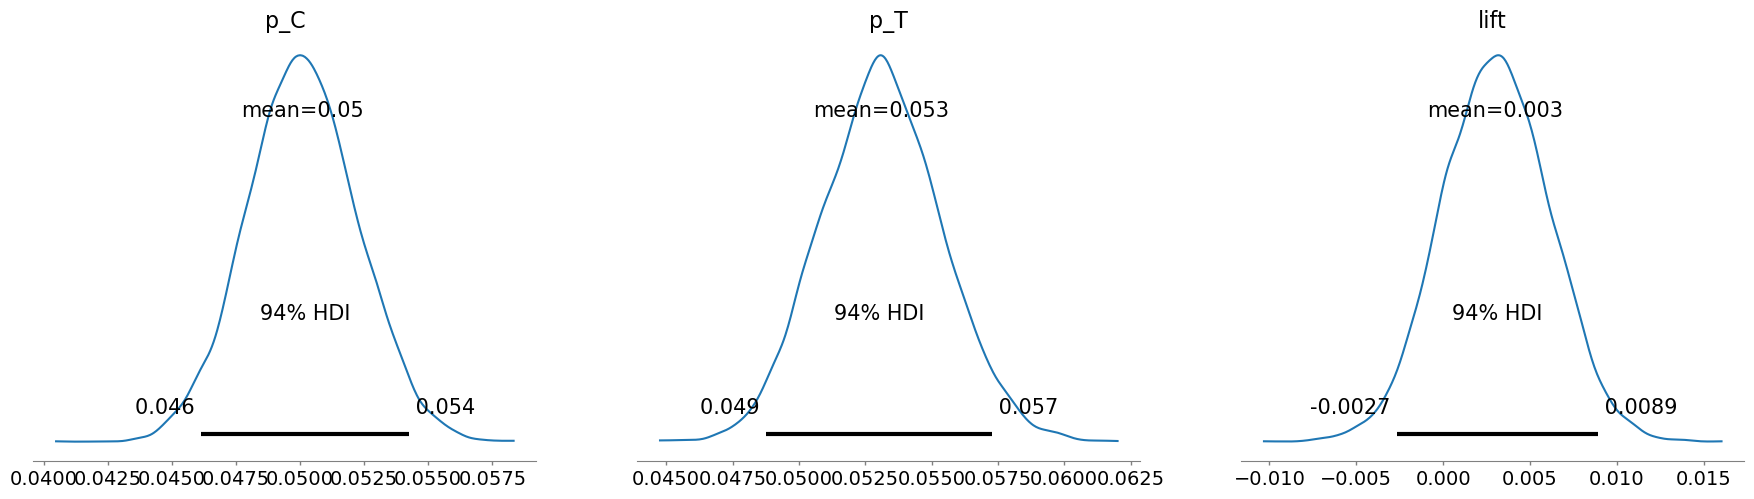

In [101]:
az.plot_posterior({'p_C': trace.posterior['p_C'].values.flatten(), 'p_T': trace.posterior['p_T'].values.flatten(), 'lift': lift_samples})

In [93]:
trace.posterior['p_T']

<xarray.DataArray 'p_T' (chain: 4, draw: 4000)> Size: 128kB
array([[0.05021692, 0.05187809, 0.05211628, ..., 0.049907  , 0.05046546,
        0.0549828 ],
       [0.05243286, 0.05271489, 0.05201919, ..., 0.05402619, 0.05995622,
        0.05228574],
       [0.05339331, 0.05277539, 0.05281243, ..., 0.04828542, 0.04905734,
        0.04915273],
       [0.05743453, 0.04973884, 0.0542272 , ..., 0.0510005 , 0.05070763,
        0.05511076]], shape=(4, 4000))
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 32kB 0 1 2 3 4 5 6 ... 3994 3995 3996 3997 3998 3999

In [107]:
import statsmodels.formula.api as smf

In [108]:
df = pd.DataFrame({
    'spend': [100, 150, 200, 250],
    'Treated': [0, 0, 1, 1],
    'Post': [0, 1, 0, 1]
})


In [124]:
olsmodel = smf.ols('spend ~ Treated + Post + Treated:Post',df).fit()

In [125]:
olsmodel.summary()

/opt/miniconda3/envs/dlcpu/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/miniconda3/envs/dlcpu/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/miniconda3/envs/dlcpu/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/miniconda3/envs/dlcpu/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 10 Nov 2025   Prob (F-statistic):                nan
Time:                        13:39:06   Log-Likelihood:                 113.63
No. Observations:                   4   AIC:                            -219.3
Df Residuals:                       0   BIC:                            -221.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      100.0000        inf          0        nan         nan         nan
Treated        100.0000        inf          0        nan         nan         nan
Post            50.0000        inf          0        nan         nan         nan
Treated:Post -1.332e-15        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.020
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.419
Skew:                           0.652   Prob(JB):                        0.811
Kurtosis:                       2.097   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=df['tenure'], event_observed=df['churn'])
kmf.plot_survival_function()

ModuleNotFoundError: No module named 'lifelines'

In [127]:
import pandas as pd
import numpy as np

np.random.seed(42)

data = pd.DataFrame({
    'day': range(1, 31),
    'feature_A_dau': np.random.poisson(120, 30),
    'feature_B_dau': np.random.poisson(135, 30)
})

<Axes: xlabel='dau', ylabel='Density'>

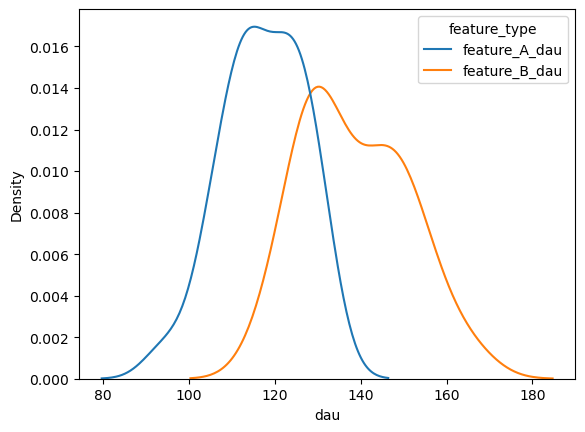

In [132]:
dat_melt = pd.melt(data,id_vars= 'day',value_vars=['feature_A_dau','feature_B_dau'],value_name='dau',var_name = 'feature_type')
sns.kdeplot(dat_melt,x = 'dau',hue = 'feature_type')

In [135]:
print(data['feature_A_dau'].mean(),data['feature_B_dau'].mean())

117.3 138.5


In [136]:
from statsmodels.stats.weightstats import ttest_ind

In [139]:
z,p,l = ttest_ind(data['feature_A_dau'],data['feature_B_dau'])

In [ ]:
pd.crosstab()

np.float64(-7.479337183620373)

In [147]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# --- Step 1: make fake data ---
np.random.seed(42)
n_per_group = 200
periods = [-2, -1, 0, 1, 2]  # time before/after treatment

records = []
for g in ['control', 'treated']:
    for t in periods:
        base = 50 + 2*t                    # common time trend
        treat_effect = 10 if (g == 'treated' and t >= 0) else 0
        y = base + treat_effect + np.random.normal(0, 3, n_per_group)
        for val in y:
            records.append((g, t, val))

df = pd.DataFrame(records, columns=['group', 'time', 'outcome'])
df['post'] = (df['time'] >= 0).astype(int)
df['treated'] = (df['group'] == 'treated').astype(int)



In [153]:
mod = smf.ols('outcome ~ post + treated + treated:post',df)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     2396.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:01:58   Log-Likelihood:                -5232.3
No. Observations:                2000   AIC:                         1.047e+04
Df Residuals:                    1996   BIC:                         1.050e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       47.0676      0.166    284.033      0.000      46.743      47.393
post             4.9839      0.214     23.297      0.000       4.564       5.403
treated          0.1409      0.234      0.601      0.548      -0.319       0.600
treated:post    10.0227      0.303     33.128      0.000       9.429      10.616
==============================================================================
Omnibus:                        0.153   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.926   Jarque-Bera (JB):                0.099
Skew:                          -0.004   Prob(JB):                        0.952
Kurtosis:                       3.033   Cond. No.                         7.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
np.random.seed(42)

n = 500

df = pd.DataFrame({
    "Sale_Amount": np.random.gamma(shape=2, scale=100, size=n),
    "Customer_Age": np.random.normal(35, 10, n).clip(18, 70),
    "Region": np.random.choice(["North", "South", "East", "West"], size=n),
    "Purchase_Date": pd.date_range("2023-01-01", periods=n, freq="D")
})

df.head()

,Sale_Amount,Customer_Age,Region,Purchase_Date
0,239.367939,52.945579,West,2023-01-01
1,149.446473,41.947610,West,2023-01-02
2,138.228358,24.391732,West,2023-01-03
3,138.230229,18.000000,South,2023-01-04
4,464.971441,26.297768,West,2023-01-05


In [29]:
df.dtypes

Sale_Amount             float64
Customer_Age            float64
Region                   object
Purchase_Date    datetime64[ns]
dtype: object

In [37]:
sns.displot(df,x = 'Customer_Age',row = 'Region',col_wrap= 2)

ValueError: Cannot use `row` and `col_wrap` together.

<Axes: ylabel='Count'>

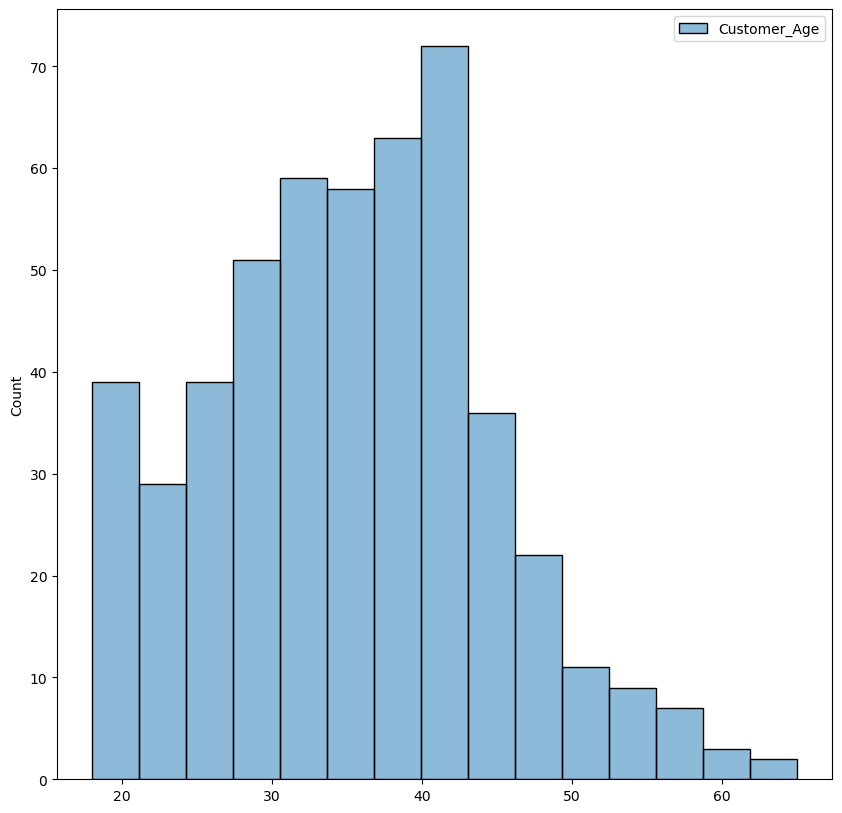

In [25]:
fig,ax = plt.subplots(figsize = (10,10),squeeze=False)

sns.histplot(df[['Customer_Age']].round(),ax = ax[0,0])

In [3]:
from data_loader import *
read_fixtures_for_season('Liverpool', 2025, sleep_time=20)

processing for Liverpool, 2025
Pulling for Liverpool,2025 with league_id: 39


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_fixtures['winner'] = np.where(team_fixtures.teams_home_winner == True,team_fixtures.teams_home_name,
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:141: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - 

AttributeError: 'DataFrame' object has no attribute 'dribbles_success'

In [ ]:
# Load reference data once
# The home_dir variable is expected to be defined in utils.py and point to the project root.
leagues_dat = pd.read_sql("select * from overperformxg.league",config['MYSQL_STRING'])
teams_data = pd.read_sql("select * from overperformxg.team_league_map",config['MYSQL_STRING'])
teams_data = teams_data.merge(leagues_dat, left_on='league', right_on="league_id", how="left")


def update_team_season_fixtures(team_name, season):
    """
    Checks for updates for a given team and season, fetches data if needed,
    and writes to the database.
    """
    engine = create_engine(db_url)


    
    max_fixture_date = None
    try:
        query = f"SELECT MAX(fixture_date) as max_date FROM overperformxg.complete_data WHERE team = '{team_name}' AND season = {season}"
        result = pd.read_sql(query, engine)
        if not result.empty and result['max_date'].iloc[0] is not None:
            max_fixture_date = pd.to_datetime(result['max_date'].iloc[0])
    except Exception as e:
        print(f"Could not fetch max fixture date from DB for team {team_name} (ID: {team_id}), season {season}. Error: {e}")

    if max_fixture_date is None or datetime.now() > max_fixture_date:
        print(f"Checking for new fixture data for team {team_name}, season {season}.")
        
        # This function is expected to fetch data and save a parquet file. It needs team name.
        read_fixtures_for_season(team_name, season, sleep_time=20)

        fixtures_dir = os.path.join(home_dir, "data/Fixtures")
        fixture_file = os.path.join(fixtures_dir, f"{team_name.replace(' ', '_')}_{season}.parquet")

        if os.path.exists(fixture_file):
            print(f"Processing fixture file: {fixture_file}")
            df = pd.read_parquet(fixture_file)
            
            if df.empty:
                print(f"Fixture file for team {team_name}, season {season} is empty. Nothing to process.")
                return

            df = df.reset_index(drop=True)

            # Data checks and transformations
            if 'passes_accuracy' in df.columns:
                df['passes_accuracy'] = df['passes_accuracy'].astype("float64")
                df.rename(columns={'passes_accuracy': 'passes_accurate'}, inplace=True)
            
            df['fixture_date'] = pd.to_datetime(df['fixture_date'])
            df['fixture_date_dt'] = df['fixture_date'].dt.date
            df = create_datetime_columns(df, 'fixture_date')
            
            if 'games_rating' in df.columns:
                df['games_rating'] = pd.to_numeric(df['games_rating'], errors='coerce')

            df['season'] = df['fixture_date'].apply(get_season)

            # Targets
            if 'outcome' in df.columns:
                df['outcome_num'] = pd.Categorical(df.outcome).codes
                df['win'] = np.where(df.outcome.str.lower() == 'win', 1, 0)
                df['draw'] = np.where(df.outcome.str.lower() == 'draw', 1, 0)
                df['loss'] = np.where(df.outcome.str.lower() == 'loss', 1, 0)

            # Joins
            df = df.merge(
                teams_data[['team_id', 'team_name', 'league_id', 'league_name']].drop_duplicates(subset=['team_id']),
                how='left',
                on='team_id'
            )
            df = df.drop_duplicates()

            # Drop duplicates already in the database
            try:
                existing_fixture_ids_query = f"SELECT DISTINCT fixture_id FROM overperformxg.complete_data WHERE team_name = '{team_name}' AND season = {season}"
                fixtures_id_df = pd.read_sql(existing_fixture_ids_query, con=engine)
                if not fixtures_id_df.empty:
                    existing_fixture_ids = fixtures_id_df['fixture_id'].tolist()
                    df = df[~df.fixture_id.isin(existing_fixture_ids)]
            except Exception as e:
                print(f"Could not fetch existing fixture IDs from DB. Writing all data. Error: {e}")

            # Write to DB
            if not df.empty:
                print(f"Writing {len(df)} new records to the database.")
                #write_df_to_db(df, "complete_data", db_type="mysql", db_url=db_url)
            else:
                print("No new records to write to the database.")
        else:
            print(f"Fixture file for team {team_name}, season {season} not found after attempting to fetch.")
    else:
        print(f"Fixture data for team {team_name}, season {season} is up-to-date (last fixture on {max_fixture_date.date()}).")
